# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

In [20]:
import pandas as pd
import numpy as np

## 1. Load and check the dataset

In [28]:
df = pd.read_csv("Summary of Weather.csv")
df.shape


C:\Users\Wade Yan\AppData\Local\Temp\ipykernel_40924\3785894266.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


(119040, 31)

Our dataset had 31 feature and 119040 rows.

In [29]:
df.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Clean the dataset, drop variables

### 2.1 deal with empty columns

<Axes: >

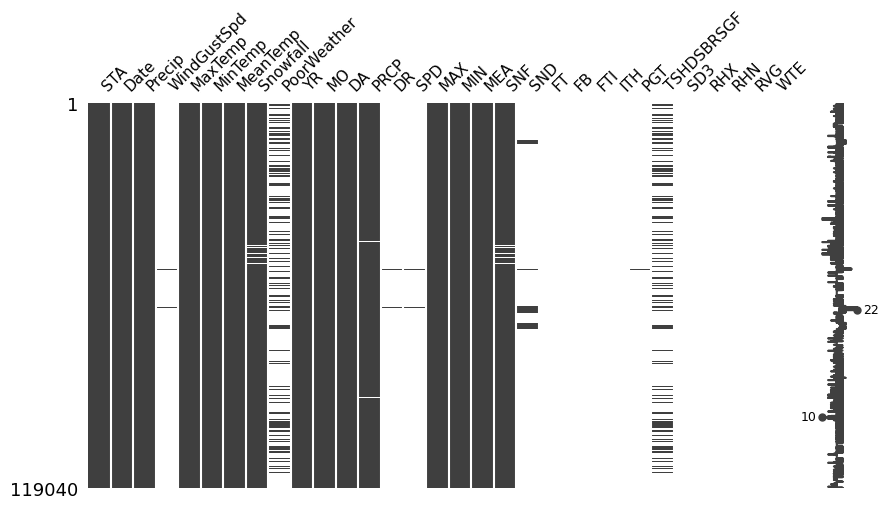

In [30]:
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

We can see there are bunches of columns are empty that needed to remove them.

In [8]:
# delete all empty columns
df = df.dropna(axis=1, how='all')
df.shape[1]

22

In [12]:
df.head(5)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN


### clean columns

Most of the columns are seem to be in a correct data type at the first glance, but in fact that's not true. I checked the data type of each columns there are a few columns should have been numerical type but in a object type such as **Precip**, **Snowfall**.

In [31]:
print(df.dtypes)


STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object


In [32]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

**PoorWeather** and **TSHDSBRSGF** are having exactly the same information. We should remove one of them 

In [ ]:
## showing these two columns have same infomation
df["PoorWeather"].equals(df["TSHDSBRSGF"])

True

## 3. Select the feature(s) for the model, and explain the reason

In [76]:
# write your answer here

## 4. Split the dataset (80% for training, 20% for testing)

## 5. Choose the algorithm, train and test the model

## 6. Evaluate and Visualize model Performance

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [77]:
# write your answer here

## 8. Discuss the model performance based on the plot

In [78]:
# write your answer here